# Twitter We Rate Dogs Project

## Table of Contents

<ul>
<li><a href="#import">Importing Necessary Libaries</a></li>
<li><a href="#gather">Data Gathering</a></li>    
<li><a href="#access">Accessing Data</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#analyze">Analysis and Visualization</a></li>

</ul>

<a id='import'></a>

## Importing Necessary Libaries

In [389]:
import pandas as pd
import numpy as np
import json
import os
import tweepy
import requests
import re
import random
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<a id='gather'></a>

## Gathering Data

#### Downloading Files Programmatically - Image Prediction File

In [390]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split("/")[-1]

open(file_name, 'wb').write(response.content)
imagePrediction = pd.read_csv(file_name, sep = '\t')

#### Reading from a CSV File

In [391]:
fileName = 'twitter-archive-enhanced.csv'
twitter_archive = pd.read_csv(fileName)

#### Gathering data from Twitter

In [392]:
with open ("tweet_json.txt") as file:
    list1 = []
    count = 0 
    while True:
        count = count + 1
        text = file.readline()
        if not text:
            break
        text_dict = json.loads(text)
        list1.append(text_dict)

In [393]:
json_df = pd.DataFrame(list1)

<a id='access'></a>

## Accessing Data

In [394]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [395]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [396]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [397]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [398]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [399]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [400]:
twitter_archive.shape

(2356, 17)

In [401]:
twitter_archive.duplicated().sum()

0

In [402]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [403]:
json_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2323,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2324,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2325,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [404]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   object 
 3   full_text                      2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   display_text_range             2327 non-null   object 
 6   entities                       2327 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2327 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

- **The Time Stamp column is not in the correct format.**
- **There are some invalid names in the dataset.**
- **The source column is enclosed in html tags**
- **The data should only contain tweets and not retweets or replies**
- **All Retweet and Reply related columns were dropped because they had null values all-thorugh**
- **The Expanded urls containing the links to the urls contains 3 missing values**
- **Combine Numerator and Denominator Rating to one Rating Column**
- **The Doggo, Flooper etc. dog stages should'nt be in separate columns**
- **The Retweeted and Favorite columns should be added to the dataset**
- **In the Image Prediction data, some of the predictions were not classified as dogs**

<a id='clean'></a>

## Cleaning Data

In [405]:
twitter_archive_copy = twitter_archive.copy()

**The Time Stamp column is not in the correct format.**

+ Define : Extract Year, Month Day from Time Stamp and Convert it to Datetime from Object
+ Code: The extraction can be done using regular expressions and conversion using python datetime method.
+ Test: Upon cleansing, the first few rows of the column is checked.

In [406]:
timestamp = []
for i in twitter_archive_copy['timestamp']:
    x = re.findall(r"\d{4}-\d{2}-\d{1,2}", i)
    for time in x:
        timestamp.append(time)

twitter_archive_copy['timestamp'] = timestamp
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

In [407]:
twitter_archive_copy['timestamp'].head()

0   2017-08-01
1   2017-08-01
2   2017-07-31
3   2017-07-30
4   2017-07-29
Name: timestamp, dtype: datetime64[ns]

**There are some invalid names in the dataset.**

- Define: The 'A' and 'None' names should be converted to N/A
- Code: The column is explored and then replaced from None, A to N/A
- Test: The unique values are explored to see if changes are made

In [408]:
twitter_archive_copy['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [409]:
twitter_archive_copy['name'].replace({'None':np.nan,'a':np.nan}, inplace=True)
#There are 745 None and 55 'A' values totalling 800 incorrectly named values

In [410]:
twitter_archive_copy.name.isnull().sum()

800

**The source column is enclosed in html tags**

- Define: The source of the tweet is enclosed with html tags
- Code: String Operations are done to extract the text
- Test: The first few rows of the edited data is checked

In [411]:
source_edited = []
for i in twitter_archive_copy.source:
    j = i.split(">")[1]
    j = j.replace("</a", "")
    source_edited.append(j)

In [412]:
twitter_archive_copy['source'] = source_edited

In [413]:
twitter_archive_copy.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

**The data should only contain tweets and not retweets or replies**

- Define: Remove the rows containing retweets or replies from the archive dataset
- Code: Removal can be done using the drop and notna methods
- Test: The size of the dataframe is checked

In [414]:
twitter_archive_copy['in_reply_to_user_id'].notna().sum()

78

In [415]:
twitter_archive_copy['retweeted_status_user_id'].notna().sum()

181

In [416]:
twitter_archive_copy.shape

(2356, 17)

In [417]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['in_reply_to_user_id'].isnull()]
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_user_id'].isnull()]

In [418]:
twitter_archive_copy.shape

(2097, 17)

**All Retweet and Reply related columns were dropped because they had null values all-thorugh**


- Define: Remove the columns relating to retweet and reply
- Code: Using Dropna in axis 1 (column), remove: 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'
                          
- Test: Check the first few rows of the dataframe

In [419]:
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                          'retweeted_status_timestamp'], axis=1)

In [420]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**The Expanded urls containing the links to the urls contains 3 missing values**

- Define: The missing values in the expanded urls column should be removed
- Code: The dropna method is used to remove the missing values
- Test: The isnull() method is used to check if there are missing values in the column

In [421]:
twitter_archive_copy = twitter_archive_copy.dropna(subset=['expanded_urls'], how='all', axis=0)

#Reference: https://www.machinelearningplus.com/pandas/pandas-dropna-how-to-drop-missing-values/

In [422]:
twitter_archive_copy['expanded_urls'].isnull().sum()

0

**Combine Numerator and Denominator Rating to one Rating Column**
- Define: Create a column rating to contain the rating for each dog
- Code: Combine the numerator and denominator rating a single column over 10
- Test: Check the first few rows of the rating column

In [423]:
twitter_archive_copy.rating_numerator.value_counts()

12      485
10      434
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [424]:
twitter_archive_copy.rating_denominator.value_counts()

10     2077
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [425]:
top = twitter_archive_copy['rating_numerator']
bottom = twitter_archive_copy['rating_denominator']
twitter_archive_copy['ratings'] = top/bottom*10

In [426]:
lista= []
for i in twitter_archive_copy.ratings.values:
    string = f'{i:.0f}/10'
    lista.append(string)
twitter_archive_copy['rating'] = lista

In [427]:
twitter_archive_copy.drop(['rating_numerator','rating_denominator','ratings'],1,inplace=True)

In [428]:
twitter_archive_copy.rating.head()

0    13/10
1    13/10
2    12/10
3    13/10
4    12/10
Name: rating, dtype: object

**The Doggo, Flooper etc. dog stages should'nt be in separate columns**

Define: The dog stages should be combined to one column

Code: A function is created that replaces 'None' strings with an empty string in each of the columns. The strings are then concatenated. For stages with more than one dog stages, one is selected. The empty strings are replaced with missing values.

Test: The code is tested by exploring the stage column.

In [429]:
def dog_stage (df, col):
    return df[col].replace("None",'')

twitter_archive_copy['doggo'] = dog_stage(twitter_archive_copy,'doggo')
twitter_archive_copy['floofer'] = dog_stage(twitter_archive_copy,'floofer')
twitter_archive_copy['pupper'] = dog_stage(twitter_archive_copy,'pupper')
twitter_archive_copy['puppo'] = dog_stage(twitter_archive_copy,'puppo')

In [430]:
twitter_archive_copy.isnull().sum()

tweet_id           0
timestamp          0
source             0
text               0
expanded_urls      0
name             655
doggo              0
floofer            0
pupper             0
puppo              0
rating             0
dtype: int64

In [431]:
l=twitter_archive_copy['doggo'] + twitter_archive_copy['floofer'] + twitter_archive_copy['pupper'] + twitter_archive_copy['puppo']
l = l.replace(['doggopupper','doggopuppo','doggofloofer'],'doggo')
l=l.replace({'',np.nan})
twitter_archive_copy['stage'] = l
twitter_archive_copy = twitter_archive_copy.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [432]:
twitter_archive_copy.stage.head()

0    
1    
2    
3    
4    
Name: stage, dtype: object

**The Retweeted and Favorite columns should be added to the columns**


- Define: The favorite and retweed columns would be combined to twitter_archive data on tweet id
- Code: We could combine the two dataframes using the pd.merge function
- Test: The first few rows of the dataset are explored

In [433]:
json_df_copy = json_df[['id','favorite_count','retweet_count']]
json_df_copy.head()

,id,favorite_count,retweet_count
0,892420643555336193,33860,7024
1,892177421306343426,29365,5304
2,891815181378084864,22085,3488
3,891689557279858688,36987,7237
4,891327558926688256,35364,7775


In [434]:
twitter_archive_copy = twitter_archive_copy.merge(json_df_copy, right_on='id',left_on='tweet_id')

In [435]:
twitter_archive_copy = twitter_archive_copy.drop(['id'], axis = 1)

In [436]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,,33860,7024
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,,29365,5304
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,,22085,3488
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,,36987,7237
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,,35364,7775


**In the Image Prediction data, some of the predictions were not classified as dogs**

Define: The breedPredict is created to contain the predictions of dog breeds in the imagePrediction Data. Since some dog breed predictions are not correct, p1, p2 and p3 are checked for a better prediction. 

Code: By applying conditional statements in the imagePrediction dataframe, the correct dog predictions are selected and a missing value(nan) returned when none of the predictions are classified as dogs. 

Test: The first five rows of the breedPredict series is explored.

In [437]:
imagePrediction['breedPredict'] = imagePrediction['p1']
imagePrediction.breedPredict[imagePrediction['p1_dog'] != True] = imagePrediction['p2']
imagePrediction.breedPredict[(imagePrediction['p1_dog'] != True) & (imagePrediction['p2_dog'] != True)] = imagePrediction['p3']
imagePrediction.breedPredict[(imagePrediction['p1_dog'] != True) & (imagePrediction['p2_dog'] != True) & (imagePrediction['p3_dog'] != True)] = np.nan

In [438]:
imagePrediction.breedPredict.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: breedPredict, dtype: object

In [439]:
imagePrediction_copy = imagePrediction[['tweet_id','breedPredict']]

In [440]:
twitter_archive_copy = twitter_archive_copy.merge(imagePrediction_copy, right_on='tweet_id',left_on='tweet_id')

In [441]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,favorite_count,retweet_count,breedPredict
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,,33860,7024,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,,29365,5304,Chihuahua
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,,22085,3488,Chihuahua
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,,36987,7237,Labrador_retriever
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,,35364,7775,basset


In [443]:
twitter_archive_copy.to_csv("twitter_archive_master.csv", index=False)

In [ ]:
wrangled_data = pd.read_csv("twitter_archive_master.csv")

<a id='analyze'></a>

## Analysis and Visualization

In [444]:
wrangled_data.shape

(1963, 11)

In [445]:
wrangled_data.dtypes #TimeStamp datatype has changed

tweet_id                   int64
timestamp         datetime64[ns]
source                    object
text                      object
expanded_urls             object
name                      object
rating                    object
stage                     object
favorite_count             int64
retweet_count              int64
breedPredict              object
dtype: object

In [446]:
wrangled_data.timestamp = pd.to_datetime(wrangled_data.timestamp)

In [447]:
print (wrangled_data.timestamp.max())#August 1st 2017 is the last date
print (wrangled_data.timestamp.min())#November 15th 2015 is the first date

2017-08-01 00:00:00
2015-11-15 00:00:00


In [448]:
wrangled_data.isnull().sum()

tweet_id             0
timestamp            0
source               0
text                 0
expanded_urls        0
name               578
rating               0
stage             1661
favorite_count       0
retweet_count        0
breedPredict       305
dtype: int64

In [449]:
wrangled_data.source.value_counts([0])

Twitter for iPhone    0.980642
Twitter Web Client    0.014264
TweetDeck             0.005094
Name: source, dtype: float64

In [450]:
wrangled_data.source.value_counts()

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [469]:
list1 = []
for i in wrangled_data.rating:
    regex = re.findall(r"(\d+)/10", i)
    list1.append(regex[0])

rating_Series = pd.Series(list1).astype("int")
print (rating_Series.value_counts())

12      448
10      417
11      397
13      249
9       150
8        96
7        51
5        34
14       33
6        33
3        19
4        15
2        10
1         4
1776      1
26        1
27        1
75        1
34        1
0         1
420       1
dtype: int64


In [468]:
wrangled_data[wrangled_data.rating =='75/10']

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,favorite_count,retweet_count,breedPredict
495,786709082849828864,2016-10-13,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,Logan,75/10,NaN,17387,5745,Pomeranian


In [473]:
imagePrediction[imagePrediction['tweet_id'] ==786709082849828864 ]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breedPredict
1515,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,Pomeranian


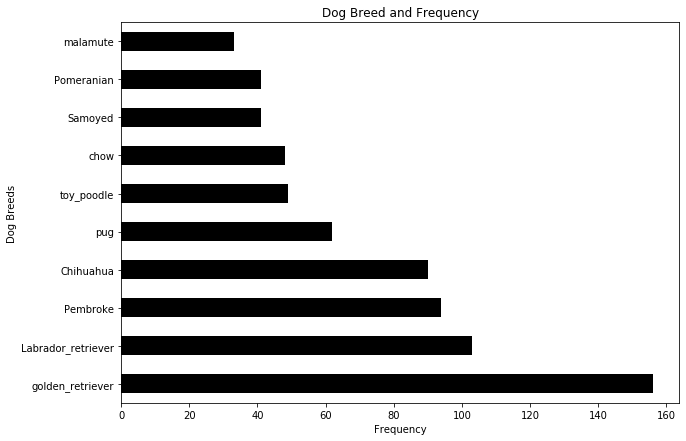

In [454]:
fig = plt.figure(figsize =(10, 7))

wrangled_data['breedPredict'].value_counts().nlargest(10).plot.barh(color = 'black')
plt.ylabel("Dog Breeds")
plt.xlabel("Frequency")
plt.title("Dog Breed and Frequency");

In [455]:
wrangled_data.breedPredict.isnull().sum()

305

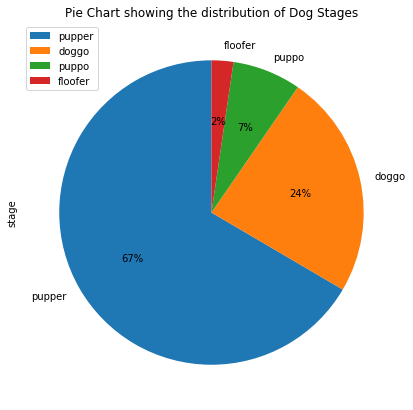

In [456]:
fig = plt.figure(figsize =(10, 7))

wrangled_data.stage.value_counts().plot.pie(autopct='%.f%%', startangle=90)
plt.title("Pie Chart showing the distribution of Dog Stages")
plt.legend();

In [457]:
favorite_retweet = wrangled_data[['favorite_count','retweet_count']]
favorite_retweet.corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.928519
retweet_count,0.928519,1.000000


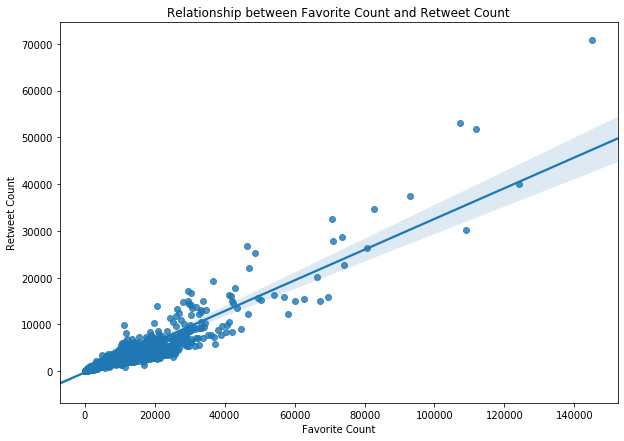

In [458]:
fig = plt.figure(figsize =(10, 7))
sns.regplot(favorite_retweet['favorite_count'], favorite_retweet['retweet_count'])
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")
plt.title("Relationship between Favorite Count and Retweet Count");